# The United Kingdom's vaccination programme

**Note: I will continue to update this project with new ideas as they come to me!**

The vaccination programme in the United Kingdom is one of the leading in the world today.

It is also a world leader in helping others to increase their vaccinations. The Oxford/AstraZeneca vaccine was funded by the UK govt. and is the only COVID-19 vaccine that is sold at cost - no profit is made.


# Comparison with Europe

Following Brexit, the UK was able to act independently of the European Union, and in this case, it has proven an invaluable advantage.

In this notebook, I will provide an overview of the UK's vaccination programme as it stands today, and I will compare to to some of the other largest economies in Europe.

# Manufacturers & Administration

I will also create visuals that show the source of the UKs vaccones, and then how the doses are administered to priority groups.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/supplementary-data/data_2021-Mar-28.csv
/kaggle/input/supplementary-data/europe_pop.csv


In [2]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt


In [3]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 411 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
# Data sets
data = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
uk_uptake = pd.read_csv('/kaggle/input/supplementary-data/data_2021-Mar-28.csv')
europe_pop = pd.read_csv('/kaggle/input/supplementary-data/europe_pop.csv')
# features
uk_uptake["date"] = pd.to_datetime(uk_uptake["date"], format = '%Y-%m-%d')
uk_uptake = uk_uptake.replace([np.inf, -np.inf], np.nan)
uk_uptake = uk_uptake.fillna(0)
share_daily = uk_uptake.groupby('date')['cumVaccinationFirstDoseUptakeByPublishDatePercentage','cumVaccinationSecondDoseUptakeByPublishDatePercentage'].sum()
share_daily.columns = ['First Dose Population %','Second Dose Population %']



In [5]:
# Color selection: UK govt. cols
# https://design-system.service.gov.uk/styles/colour/

# Progress


It is widely reported that the UK has one of the most successful vaccination programme sin the world at this point, but what does that mean?

First, I will examine the progress within the UK, then I will compare the absolute numbers to the UK's friends over in europe - namely France, Germany, and others. 

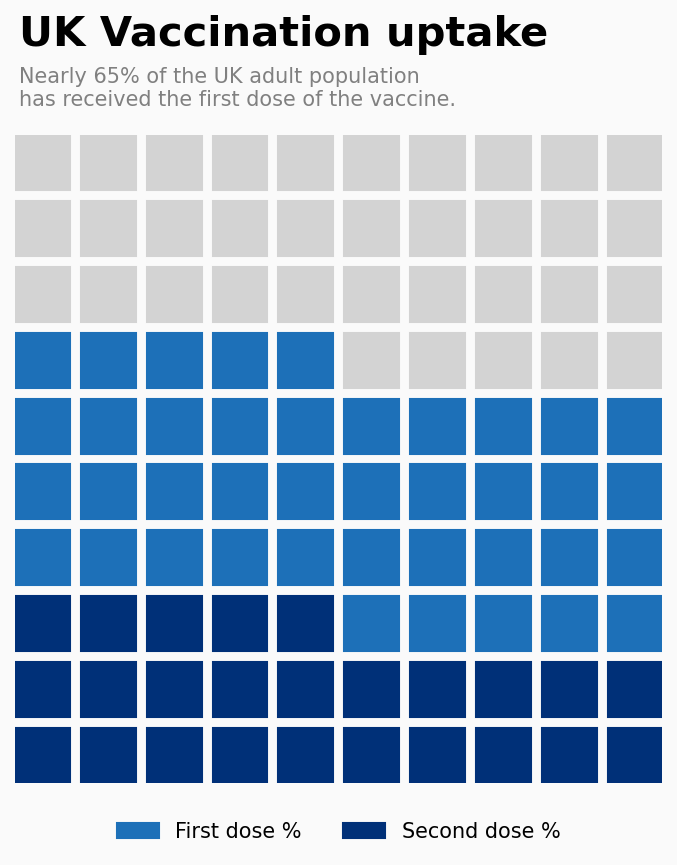

In [29]:
uk = '#1d70b8'
dark_uk = '#003078'
others = 'lightgray'
background_color = "#fafafa"

import matplotlib.pyplot as plt
from pywaffle import Waffle



fig = plt.figure(figsize=(5, 5),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=10,colors=[dark_uk,uk,others],
    columns=10,vertical=True,
    values={'Second Dose %': 25,'First Dose %': (65-25), 'Awaiting': 35})
    #characters='⬤',
    #font_size=24)

fig.text(0.035,1.09,'UK Vaccination uptake',fontfamily='arial',fontsize=20,fontweight='bold')
fig.text(0.035,1.01,'Nearly 65% of the UK adult population\nhas received the first dose of the vaccine.',color='gray',fontfamily='arial',fontsize=10)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

first_patch = mpatches.Patch(color=uk, label='First dose %')
second_patch = mpatches.Patch(color=dark_uk, label='Second dose %')

plt.legend(handles=[first_patch,second_patch],bbox_to_anchor=(0.5,-0.12),loc='lower center',ncol=2,
          facecolor=background_color, framealpha=0)

#fig.gca().set_facecolor('#EEEEEE')
#fig.set_facecolor('#EEEEEE')



plt.show()

The majority of the UKs adult population has now received a first dose of a vaccination. 

Second doses have recently started, so it will be interesting to see if the rate of vaccination slows down.


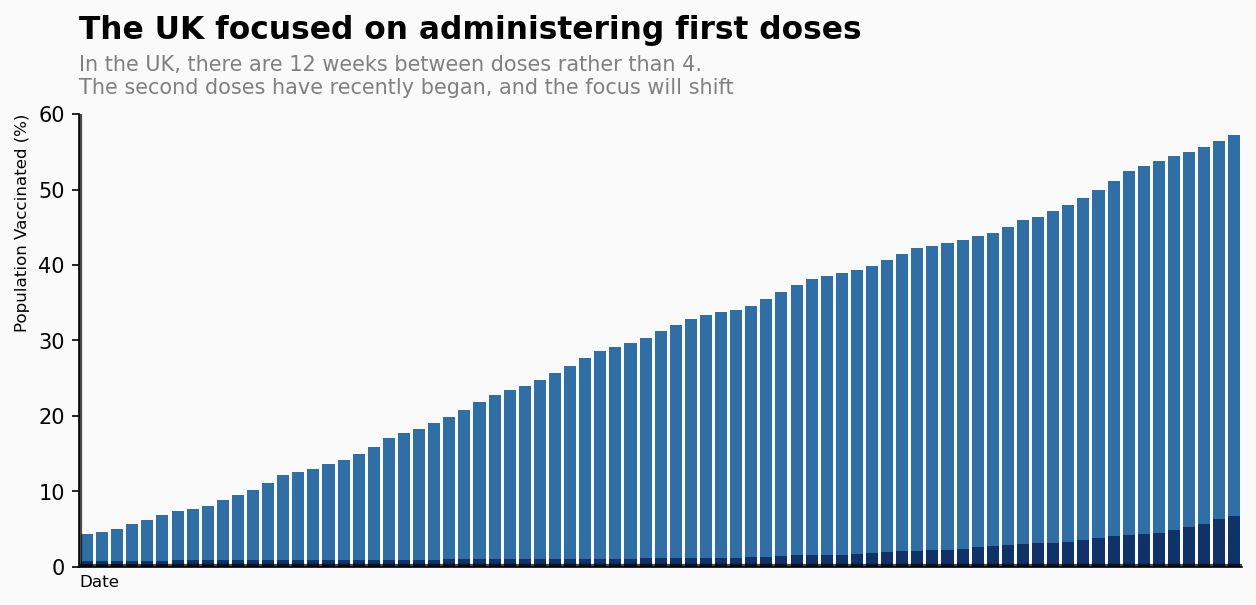

In [7]:

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)


# list to use for plotting 
uk = '#1d70b8'
others = 'lightgray'

sns.barplot(ax=ax0,x=share_daily.index,  y="First Dose Population %", data=share_daily, color=uk)

sns.barplot(ax=ax0,x=share_daily.index, y="Second Dose Population %", data=share_daily, color=dark_uk)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), 'The UK focused on administering first doses',fontfamily='Arial', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(Xstart,Yend+(Yend*0.13), 'In the UK, there are 12 weeks between doses rather than 4.\nThe second doses have recently began, and the focus will shift', color='gray', fontsize=10, ha='left', va='top')

ax0.axhline(y = 0, color = 'black', linewidth = 3, alpha = .7)
ax0.axvline(x = Xstart, color = 'black', linewidth = 3, alpha = .7)


ax0.set_xlabel("Date",fontsize=8,loc='left', fontfamily='arial')
ax0.set_ylabel("Population Vaccinated (%)",loc='top', fontfamily='arial',fontsize=8)

ax0.tick_params(labelsize=10)

ax0.tick_params(axis = "both", which = "both", bottom=False,labelbottom=False)


ax0.grid(False)
plt.show()


In [8]:
pop_europe = europe_pop.iloc[1:]

pop_europe.columns = ['id','country','Population','Yearly Change','Net Change','Density (p/km sq)','Land Area (km sq)','Migrants (Net)','Fertility Rate','Median Age','Urban Population %','World Share %']

pop_europe.drop('id',inplace=True,axis=1)


# Convert Date column to date type and fill Missing Value

data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

# if needed

country_vaccine = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()

daily_vaccination = data.groupby('date')['daily_vaccinations'].sum()
daily_vaccination = daily_vaccination / 1000000

uk = data[data['country'] == 'United Kingdom']
uk_vac = uk.groupby('date')['daily_vaccinations'].sum()

ger = data[data['country'] == 'Germany']
ger_vac = ger.groupby('date')['daily_vaccinations'].sum()

uk_daily_vaccination = uk_vac / 1000000
ger_daily_vaccination = ger_vac / 1000000


ukv = data[data['country'] == 'United Kingdom'].groupby('date')['daily_vaccinations'].sum()/1000000


focus = ['United Kingdom','Germany','France','Italy','Spain','Netherlands','Switzerland','Poland','Sweden','Russia','Portugal']

# daily

uk_daily = data[data['country'] == 'United Kingdom'].groupby('date')['daily_vaccinations'].sum()/1000
ger_daily = data[data['country'] == 'Germany'].groupby('date')['daily_vaccinations'].sum()/1000
fra_daily = data[data['country'] == 'France'].groupby('date')['daily_vaccinations'].sum()/1000
ita_daily = data[data['country'] == 'Italy'].groupby('date')['daily_vaccinations'].sum()/1000
spa_daily = data[data['country'] == 'Spain'].groupby('date')['daily_vaccinations'].sum()/1000
neth_daily = data[data['country'] == 'Netherlands'].groupby('date')['daily_vaccinations'].sum()/1000
swit_daily = data[data['country'] == 'Switzerland'].groupby('date')['daily_vaccinations'].sum()/1000
pol_daily = data[data['country'] == 'Poland'].groupby('date')['daily_vaccinations'].sum()/1000
swe_daily = data[data['country'] == 'Sweden'].groupby('date')['daily_vaccinations'].sum()/1000
rus_daily = data[data['country'] == 'Russia'].groupby('date')['daily_vaccinations'].sum()/1000
por_daily = data[data['country'] == 'Portugal'].groupby('date')['daily_vaccinations'].sum()/1000

# How does this compare to the progress on the continent?

Following Brexit, the UK has been able to act independently of the EU. Is there a performance gap between the two entities?

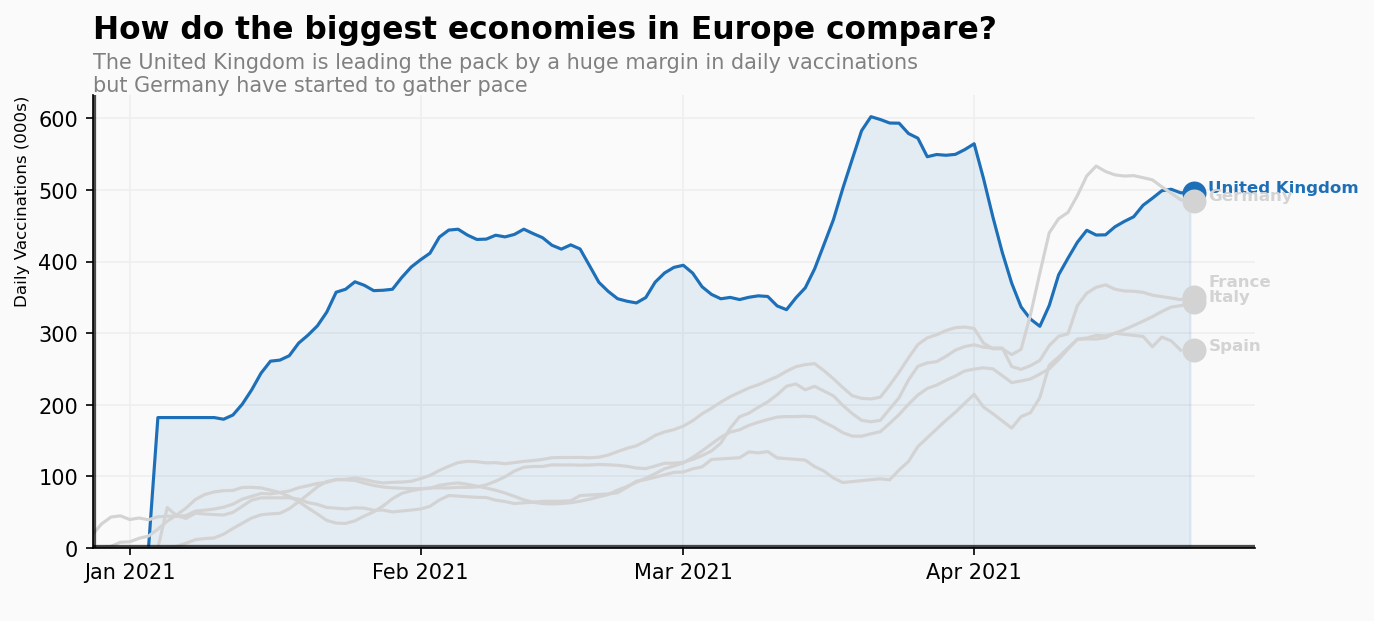

In [9]:

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)


# list to use for plotting 
uk = '#1d70b8'
others = 'lightgray'
daily = [uk_daily,ger_daily,fra_daily,ita_daily,spa_daily]
#uk
sns.lineplot(ax=ax0,data=daily[0], x=daily[0].index, y=daily[0],color=uk)
#ger
sns.lineplot(ax=ax0,data=daily[1], x=daily[1].index, y=daily[1],color=others)
#fra
sns.lineplot(ax=ax0,data=daily[2], x=daily[2].index, y=daily[2],color=others)
#ita
sns.lineplot(ax=ax0,data=daily[3], x=daily[3].index, y=daily[3],color=others)
#spa
sns.lineplot(ax=ax0,data=daily[4], x=daily[4].index, y=daily[4],color=others)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.set_xlim([Xstart,Xend])
ax0.text(Xstart+7,Yend+(Yend*0.11), 'How do the biggest economies in Europe compare?', color='black',fontfamily='Arial', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(Xstart+7,Yend+(Yend*0.095), 'The United Kingdom is leading the pack by a huge margin in daily vaccinations\nbut Germany have started to gather pace', color='gray', fontsize=10, ha='left', va='top')
    
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.set_xlim(Xstart+7, Xend)
    
ax0.set_ylabel("Daily Vaccinations (000s)",loc='top', fontfamily='arial',fontsize=8)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.tick_params(labelsize=10)
ax0.fill_between(daily[0].index, daily[0], color=uk, zorder=2, alpha=0.1)

ax0.text(Xend-5,uk_daily[-1],'United Kingdom',color =uk,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,ger_daily[-1],'Germany',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,fra_daily[-1]+15,'France',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,ita_daily[-1],'Italy',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,spa_daily[-1],'Spain',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)

ax0.plot(Xend-6.5,uk_daily[-1], 'ko', markersize=10, fillstyle='full',color=uk, markeredgewidth=1.5)
ax0.plot(Xend-6.5,ger_daily[-1], 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,fra_daily[-1], 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,ita_daily[-1], 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,spa_daily[-1], 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)


ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')

ax0.axhline(y = 0, color = 'black', linewidth = 3, alpha = .7)
ax0.axvline(x = Xstart+7, color = 'black', linewidth = 3, alpha = .7)


plt.show()

We can also view the cumulative totals

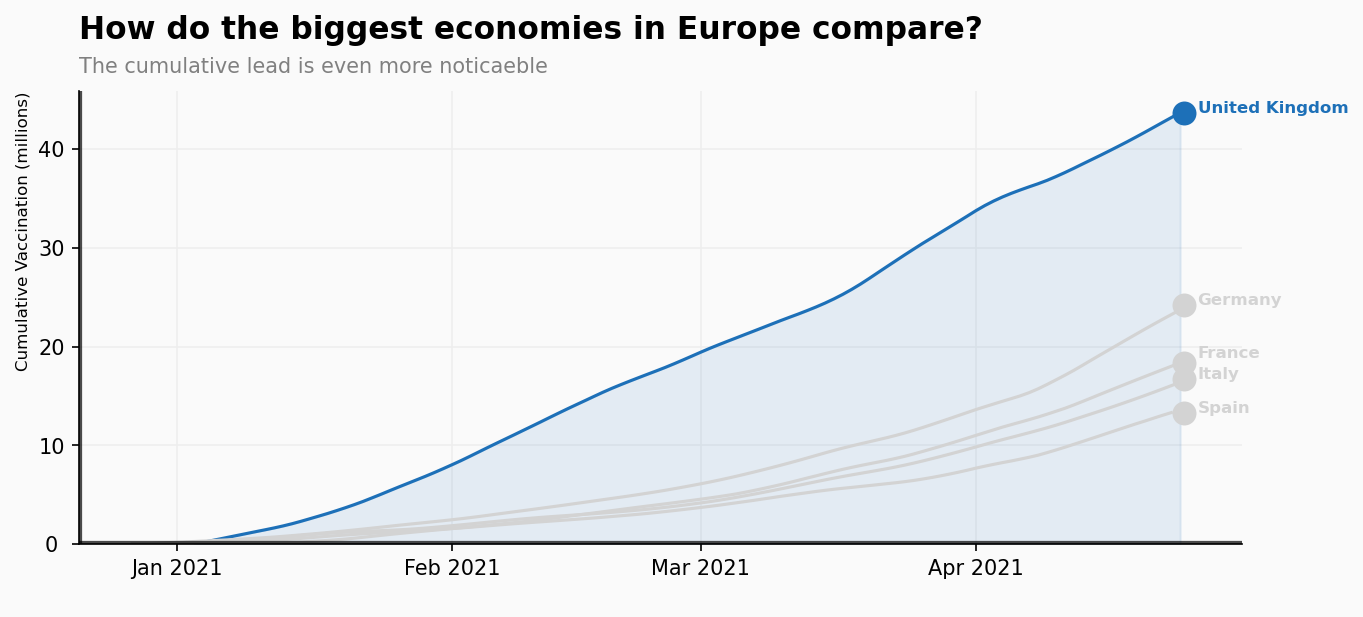

In [31]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%b %Y')

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
# format the ticks
ax0.xaxis.set_major_locator(months)
ax0.xaxis.set_major_formatter(years_fmt)


# list to use for plotting 
uk = '#1d70b8'
others = 'lightgray'
daily = [uk_daily,ger_daily,fra_daily,ita_daily,spa_daily]
#uk
sns.lineplot(ax=ax0,data=daily[0], x=daily[0].index, y=daily[0].cumsum(),color=uk)
#ger
sns.lineplot(ax=ax0,data=daily[1], x=daily[1].index, y=daily[1].cumsum(),color=others)
#fra
sns.lineplot(ax=ax0,data=daily[2], x=daily[2].index, y=daily[2].cumsum(),color=others)
#ita
sns.lineplot(ax=ax0,data=daily[3], x=daily[3].index, y=daily[3].cumsum(),color=others)
#spa
sns.lineplot(ax=ax0,data=daily[4], x=daily[4].index, y=daily[4].cumsum(),color=others)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.set_xlim(Xstart, Xend)
ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.1), 'How do the biggest economies in Europe compare?', color='black',fontfamily='Arial', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(Xstart,Yend+(Yend*0.075), 'The cumulative lead is even more noticaeble', color='gray', fontsize=10, ha='left', va='top')
    

ax0.set_ylabel("Cumulative Vaccination (millions)",loc='top', fontfamily='arial',fontsize=8)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE')
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.tick_params(labelsize=10)
ax0.fill_between(daily[0].index, daily[0].cumsum(), color=uk, zorder=2, alpha=0.1)

ax0.axhline(y = 0, color = 'black', linewidth = 3, alpha = .7)
ax0.axvline(x = Xstart, color = 'black', linewidth = 3, alpha = .7)

ax0.set_yticklabels(labels = ['0 ', '10', '20', '30', '40'])

# Add colored labels
ax0.text(Xend-5,uk_daily.cumsum().max(),'United Kingdom',color =uk,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,ger_daily.cumsum().max(),'Germany',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,fra_daily.cumsum().max()+500,'France',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,ita_daily.cumsum().max(),'Italy',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)
ax0.text(Xend-5,spa_daily.cumsum().max(),'Spain',color =others,fontfamily='arial',fontweight='bold',fontsize=8, rotation=0)


# circle at end of line
ax0.plot(Xend-6.5,uk_daily.cumsum().max(), 'ko', markersize=10, fillstyle='full',color=uk, markeredgewidth=1.5)
ax0.plot(Xend-6.5,ger_daily.cumsum().max(), 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,fra_daily.cumsum().max(), 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,ita_daily.cumsum().max(), 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)
ax0.plot(Xend-6.5,spa_daily.cumsum().max(), 'ko', markersize=10, fillstyle='full',color=others, markeredgewidth=1.5)

ax0.set_xlabel(" ",fontsize=8,loc='left', fontfamily='arial')


plt.show()

# Leading vaccine providers

So vaccination numbers are increasing around the world which is fantastic to see.

But who is providing the vaccinations? Let's investigate...

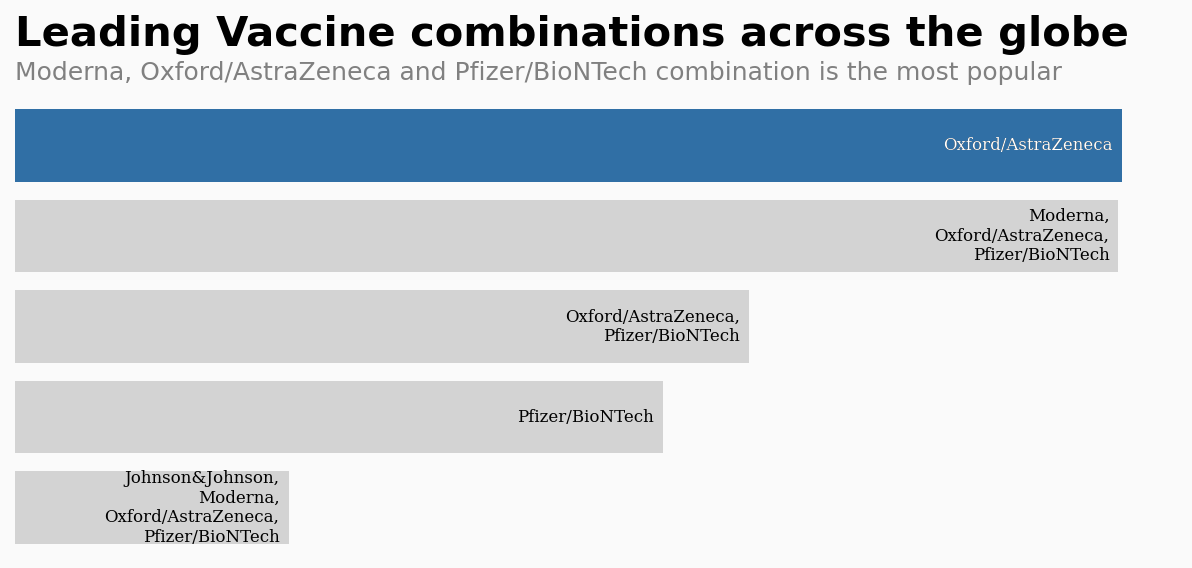

In [11]:
provs = data['vaccines'].value_counts()[:5]


fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -1, 'Leading Vaccine combinations across the globe', color='black', fontsize=20, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Moderna, Oxford/AstraZeneca and Pfizer/BioNTech combination is the most popular', 
         color='gray', fontsize=12, ha='left', va='top')

color_map = [others for _ in range(5)]
color_map[0] = uk # color highlight

sns.barplot(ax=ax0, y=provs.index, x=provs,palette=color_map, zorder=2, orient='h')
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
ax0.tick_params(labelsize=5)

labels = [ '\n'.join(wrap(l, 20)) for l in provs.index ]
ax0.set_yticklabels([])

for i in range(0,5):
    ax0.annotate(list(labels)[i], 
                   xy=(provs[i]-20, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
# diff color text
for i in range(0,1):
    ax0.annotate(list(labels)[i], 
                   xy=(provs[i]-20, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='white',rotation=0)

                 


plt.show()

These manufactuers were early-movers in the market, so perhaps this will change as more and more vaccines get approved and the choice of available providers widens.

Let's broaden our view...

In [12]:
!pip install squarify

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


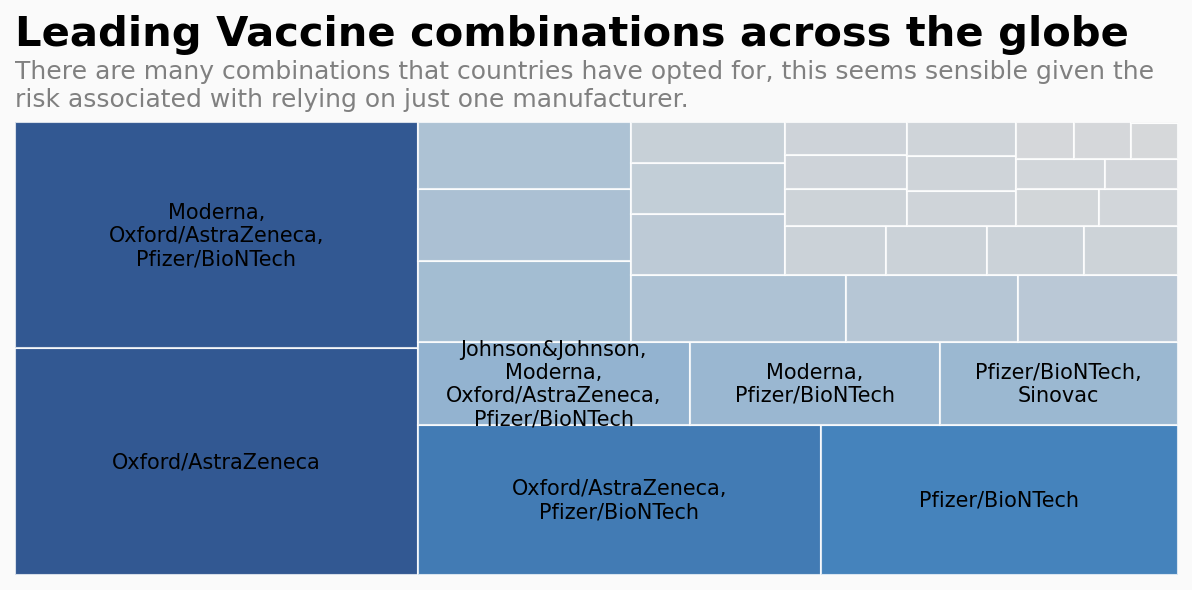

In [34]:
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)

temp = data['vaccines'].value_counts().reset_index()
 
# Change color
# create a color palette, mapped to these values
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [others,uk,dark_uk])
mini=min(temp['vaccines'])
maxi=max(temp['vaccines'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in temp['vaccines']]



fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)




labels = [ '\n'.join(wrap(l, 20)) for l in temp['index'] ]

squarify.plot(sizes=temp['vaccines'], label=labels[:7], color=colors,ec='white',alpha=.8,ax=ax0)

ax0.text(0, 115, 'Leading Vaccine combinations across the globe', color='black', fontsize=20, ha='left', va='bottom', weight='bold')
ax0.text(0, 113.8, 'There are many combinations that countries have opted for, this seems sensible given the\nrisk associated with relying on just one manufacturer.', 
         color='gray', fontsize=12, ha='left', va='top')

plt.axis('off')
plt.show()

# The UK's vaccines

So we know that most countries have opted for a combination of vaccine providers. This makes sense, as relying on just one manufacturer is a high-risk strategy.

What about the UK specifically? What providers have they opted for? Are there more vaccines  coming soon?

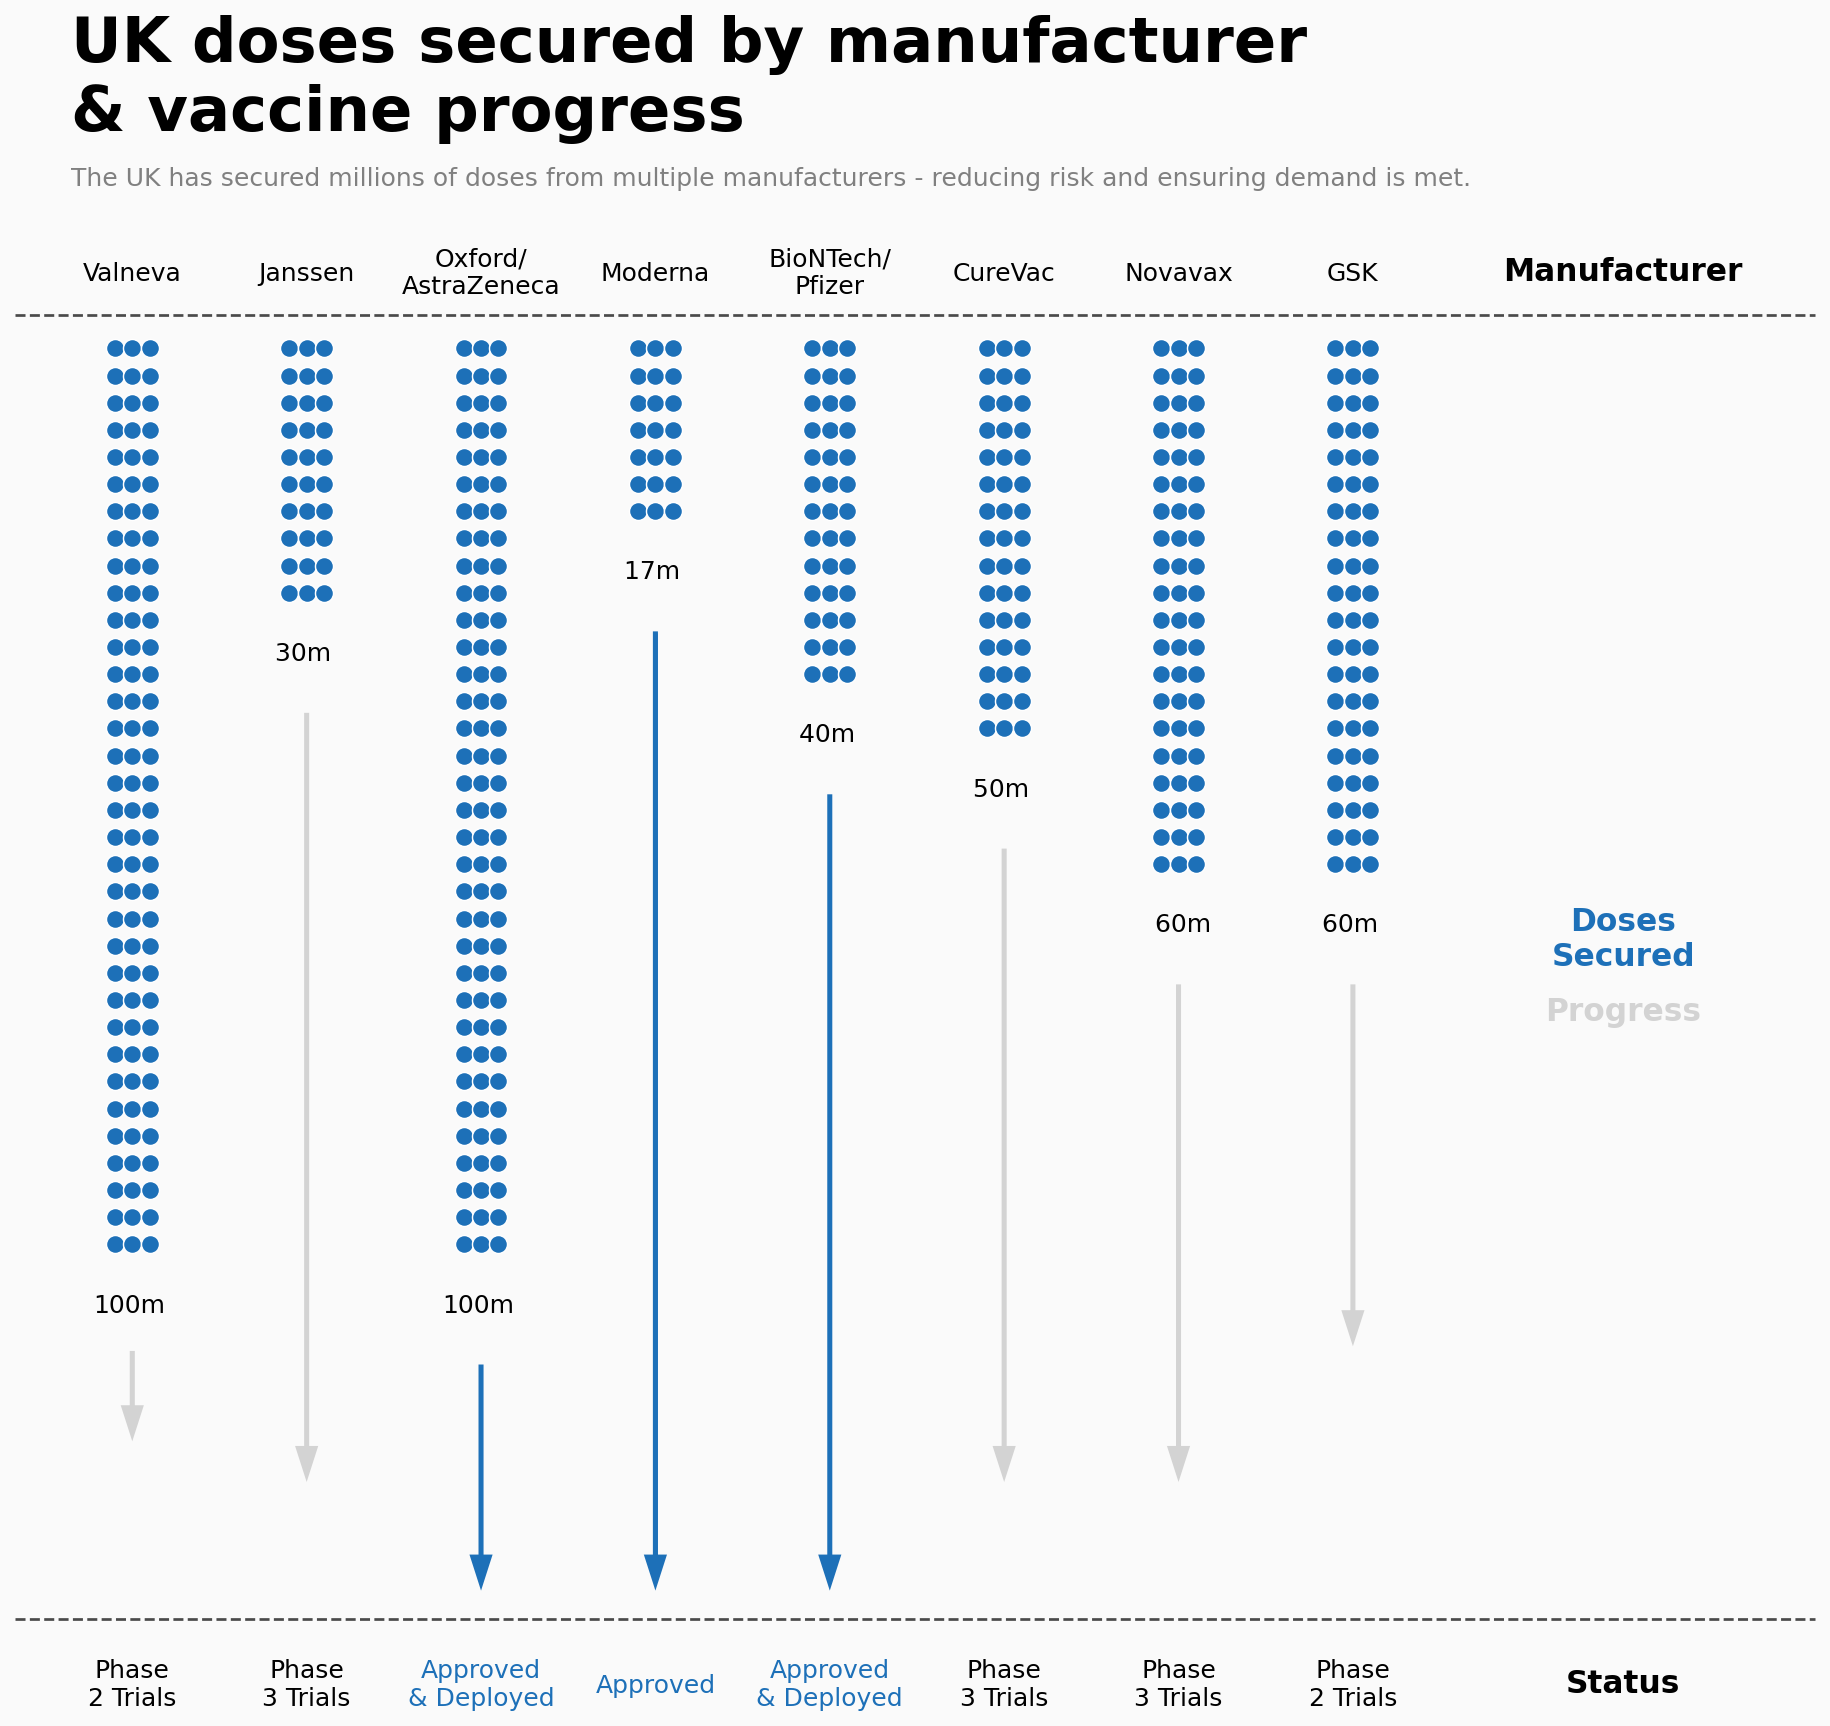

In [14]:
# Inspired by the Financial Times: https://www.ft.com/content/8b48a853-5b14-4378-91d4-17026fa15472

fig = plt.figure(figsize=(15, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

s = 75
x1=1
y = []
fs=12
for num in range(-34,0):
    y.append(num)
    
sns.scatterplot(x1+0.05,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.07,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.09,y,ax=ax0,color=uk,s=s)

ax0.text(x1+.025,y[0]-2.5,'100m',fontsize=fs)
ax0.arrow(x1+0.07, y[0]-4, 0, -2, head_width=0.02, head_length=1, color=others,linewidth=2)

y = []
for num in range(-10,0):
    y.append(num)

sns.scatterplot(x1+0.25,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.27,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.29,y,ax=ax0,color=uk,s=s)

ax0.text(x1+0.225,y[0]-2.5,' 30m',fontsize=fs)

ax0.arrow(x1+0.27, y[0]-4.5, 0, -27, head_width=0.02, head_length=1, color=others,linewidth=2)
y = []
for num in range(-34,0):
    y.append(num)
    
sns.scatterplot(x1+0.45,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.47,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.49,y,ax=ax0,color=uk,s=s)

ax0.text(x1+0.425,y[0]-2.5,'100m',fontsize=fs)
ax0.arrow(x1+0.47, y[0]-4.5, 0, -7, head_width=0.02, head_length=1, color=uk,linewidth=2)


y = []
for num in range(-7,0):
    y.append(num)
    
sns.scatterplot(x1+0.65,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.67,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.69,y,ax=ax0,color=uk,s=s)

ax0.text(x1+0.625,y[0]-2.5,' 17m',fontsize=fs)
ax0.arrow(x1+0.67, y[0]-4.5, 0, -34, head_width=0.02, head_length=1, color=uk,linewidth=2)



y = []
for num in range(-13,0):
    y.append(num)
    
sns.scatterplot(x1+0.85,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.87,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+0.89,y,ax=ax0,color=uk,s=s)

ax0.text(x1+0.825,y[0]-2.5,' 40m',fontsize=fs)
ax0.arrow(x1+0.87, y[0]-4.5, 0, -28, head_width=0.02, head_length=1, color=uk,linewidth=2)



y = []
for num in range(-15,0):
    y.append(num)
    
sns.scatterplot(x1+1.05,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.07,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.09,y,ax=ax0,color=uk,s=s)
ax0.text(x1+1.025,y[0]-2.5,' 50m',fontsize=fs)
ax0.arrow(x1+1.07, y[0]-4.5, 0, -22, head_width=0.02, head_length=1, color=others,linewidth=2)



y = []
for num in range(-20,0):
    y.append(num)
    
sns.scatterplot(x1+1.25,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.27,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.29,y,ax=ax0,color=uk,s=s)

ax0.text(x1+1.225,y[0]-2.5,'  60m',fontsize=fs)
ax0.arrow(x1+1.27, y[0]-4.5, 0, -17, head_width=0.02, head_length=1, color=others,linewidth=2)


y = []
for num in range(-20,0):
    y.append(num)
    
sns.scatterplot(x1+1.45,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.47,y,ax=ax0,color=uk,s=s)
sns.scatterplot(x1+1.49,y,ax=ax0,color=uk,s=s)

ax0.text(x1+1.425,y[0]-2.5,' 60m',fontsize=fs)
ax0.arrow(x1+1.47, y[0]-4.5, 0, -12, head_width=0.02, head_length=1, color=others,linewidth=2)



# manuf
fs=12
ax0.text(x1+0.07,1.5,'Valneva',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.27,1.5,'Janssen',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.47,1,'Oxford/\nAstraZeneca',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.67,1.5,'Moderna',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.87,1,'BioNTech/\nPfizer',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+1.07,1.5,'CureVac',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+1.27,1.5,'Novavax',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+1.47,1.5,'GSK',rotation=0,fontsize=fs,ha='center')


## All

ax0.set_xlim(1,3)
ax0.set_xticks(range(1,3))
ax0.set_yticklabels([])
# Hide grid lines
ax0.grid(False)
ax0.tick_params(axis = "both", which = "both", left=False, labelbottom=False)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
    

ax0.text(1,7,'UK doses secured by manufacturer\n& vaccine progress',fontsize=30,fontweight='bold')
ax0.text(1,5,'The UK has secured millions of doses from multiple manufacturers - reducing risk and ensuring demand is met.',color='gray',fontsize=12)

#ax0.axhline(y = -48, color = 'black', linestyle='--',linewidth = 1.3, alpha = .7)

ax0.text(x1+0.07,-51,'Phase\n2 Trials',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.27,-51,'Phase\n3 Trials',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+0.47,-51,'Approved\n& Deployed',rotation=0,fontsize=fs,ha='center',color=uk)
ax0.text(x1+0.67,-50.5,'Approved',rotation=0,fontsize=fs,ha='center',color=uk)
ax0.text(x1+0.87,-51,'Approved\n& Deployed',rotation=0,fontsize=fs,ha='center',color=uk)
ax0.text(x1+1.07,-51,'Phase\n3 Trials',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+1.27,-51,'Phase\n3 Trials',rotation=0,fontsize=fs,ha='center')
ax0.text(x1+1.47,-51,'Phase\n2 Trials',rotation=0,fontsize=fs,ha='center')

ax0.text(x1+1.78,-50.5,'Status',rotation=0,fontsize=15,fontweight='bold',ha='center')
ax0.text(x1+1.78,1.5,'Manufacturer',rotation=0,fontsize=15,fontweight='bold',ha='center')
ax0.text(x1+1.78,-23.75,'Doses\nSecured',rotation=0,fontsize=15,fontweight='bold',ha='center',color=uk)
ax0.text(x1+1.78,-25.75,'Progress',rotation=0,fontsize=15,fontweight='bold',ha='center',color=others)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

import matplotlib.lines as lines
l1 = lines.Line2D([0.1, 0.9], [0.14, 0.14], transform=fig.transFigure, figure=fig,color = 'black', linestyle='--',linewidth = 1.3, alpha = .7)
fig.lines.extend([l1])

l2 = lines.Line2D([0.1, 0.9], [0.864, 0.864], transform=fig.transFigure, figure=fig,color = 'black', linestyle='--',linewidth = 1.3, alpha = .7)
fig.lines.extend([l2])

plt.show()

# So vaccine supplies have been arranged through multiple manufacturers, but who is being given the doses?

The vaccination process is a logistical and administrative challenge. 

The UK has refined the population down to 9 priority groups, followed by the rest of the adult population, shown below:
* 1	Residents in a care home for older adults and staff working in care homes for older adults
* 2	All those 80 years of age and over and frontline health and social care workers
* 3	All those 75 years of age and over
* 4	All those 70 years of age and over and clinically extremely vulnerable individuals (not including pregnant women and those under 16 years of age)
* 5	All those 65 years of age and over
* 6	Adults aged 16 to 65 years in an at-risk group 
* 7	All those 60 years of age and over
* 8	All those 55 years of age and over
* 9	All those 50 years of age and over
* 10	Rest of the population 

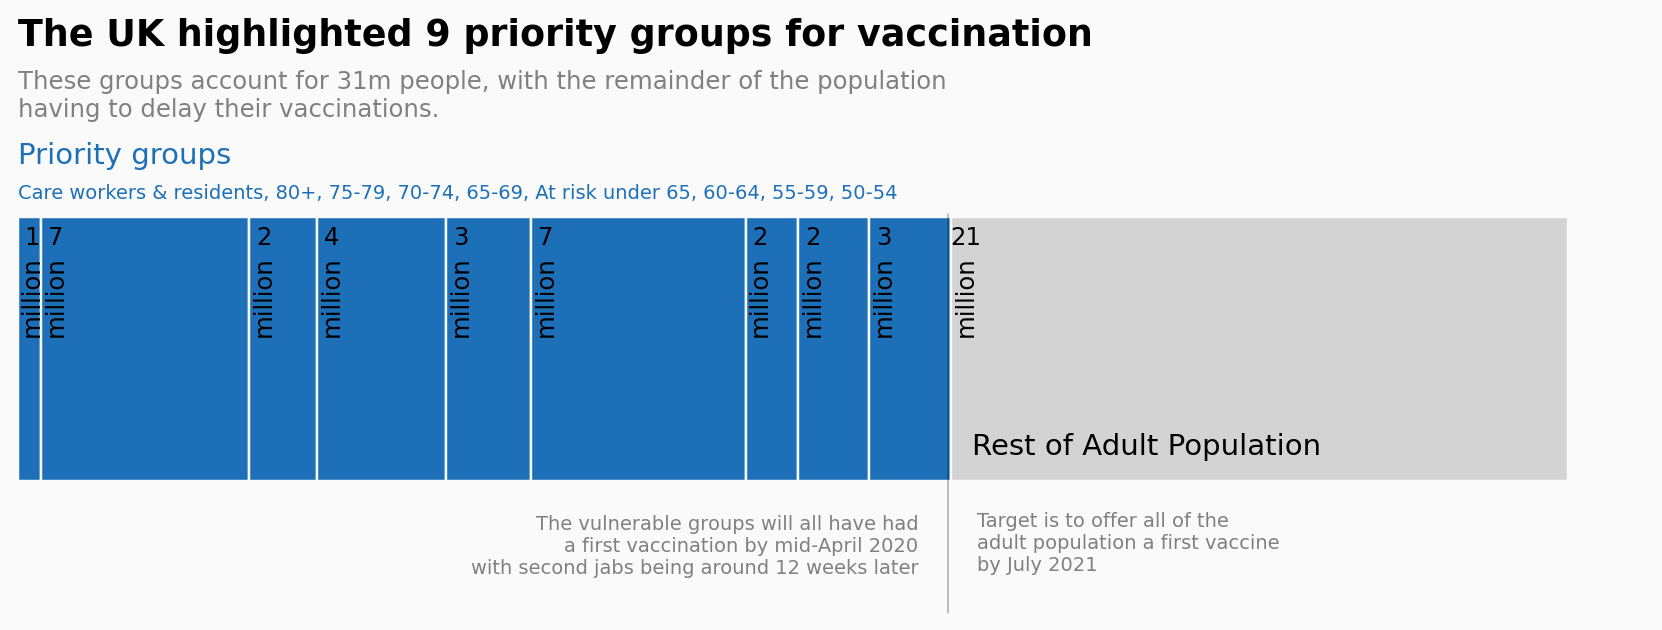

In [15]:
from matplotlib.patches import FancyBboxPatch

df_vac = pd.DataFrame(columns=['group'],data=[0.8,7.1,2.3,4.4,2.9,7.3,1.8,2.4,2.8,21])

fig = plt.figure(figsize=(12, 3), dpi=175,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


ax0.set_facecolor(background_color)

for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
    
df_vac.T.plot.barh(stacked=True, width=1, ec=background_color,color=[uk,uk,uk,uk,uk,uk,uk,uk,uk,others],legend=False,ax=ax0)



for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0.text(0,1.15,'The UK highlighted 9 priority groups for vaccination',fontsize=15,fontweight='bold')
ax0.text(0,0.88,'These groups account for 31m people, with the remainder of the population\nhaving to delay their vaccinations.',color='gray',fontsize=10)

fs=8
ax0.text(32.5,-0.4,'Rest of Adult Population',rotation=0,fontsize=12)
ax0.text(0,0.7,'Priority groups',rotation=0,fontsize=12,color=uk)
ax0.text(0,0.57,'Care workers & residents, 80+, 75-79, 70-74, 65-69, At risk under 65, 60-64, 55-59, 50-54',rotation=0,fontsize=8,color=uk)



import matplotlib.lines as lines
l1 = lines.Line2D([0.568, 0.568], [0, 0.76], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax0.text(32.7,-0.84,'Target is to offer all of the\nadult population a first vaccine\nby July 2021',color='gray',rotation=0,fontsize=8)

ax0.text(30.7,-0.85,'The vulnerable groups will all have had\na first vaccination by mid-April 2020\nwith second jabs being around 12 weeks later',color='gray',ha='right',rotation=0,fontsize=8)


# annotations

for p in ax0.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax0.text(x+width-width+0.5, 
            y+height-0.08, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
    ax0.text(x+width-width+0.5, 
            y+height-0.3, 
            'million'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=90)

plt.show()

In [16]:
total_vac = data.groupby('country')['daily_vaccinations'].sum().reset_index()
total_vac[total_vac['country'] == 'United Kingdom']

pop_vac = pd.merge(europe_pop, total_vac, on='country')
pop_vac["Population"] = pop_vac["Population"].str.replace(',','')
pop_vac["Land Area"] = pop_vac["Land Area"].str.replace(',','')
pop_vac["Population"] = pop_vac["Population"].astype(int)
pop_vac['% Pop. Vaccinated'] = pop_vac['daily_vaccinations']/pop_vac['Population']

In [17]:
pop_vac['Urban'] = pop_vac['Urban'].str.replace('%','')
pop_vac['Urban'] = pop_vac['Urban'].str.replace('N.A.','70')
pop_vac['Urban'] = pop_vac['Urban'].str.replace(' ','70')

pop_vac['Urban'] = pop_vac['Urban'].astype(float)



focus_data = pop_vac[(pop_vac['country'] == 'United Kingdom') |(pop_vac['country'] == 'Germany')|(pop_vac['country'] == 'France')
       |(pop_vac['country'] == 'Spain')|(pop_vac['country'] == 'Italy')|(pop_vac['country'] == 'Russia')|(pop_vac['country'] == 'Portugal')]

In [18]:


pop_vac['% Pop. Vaccinated'] = pop_vac[pop_vac['% Pop. Vaccinated'] != 1.708319729304562]

oxford_only = country_vaccine[country_vaccine['vaccines'] == 'Oxford/AstraZeneca']


# Where is solely Oxford/AstraZeneca used?

As I said at the beginning of this project, the UK govt. is ensuring that the Oxford/AstraZeneca jab is provided at **cost**

So where else is this vaccine being used? And just how much of a difference in cost does this provide?

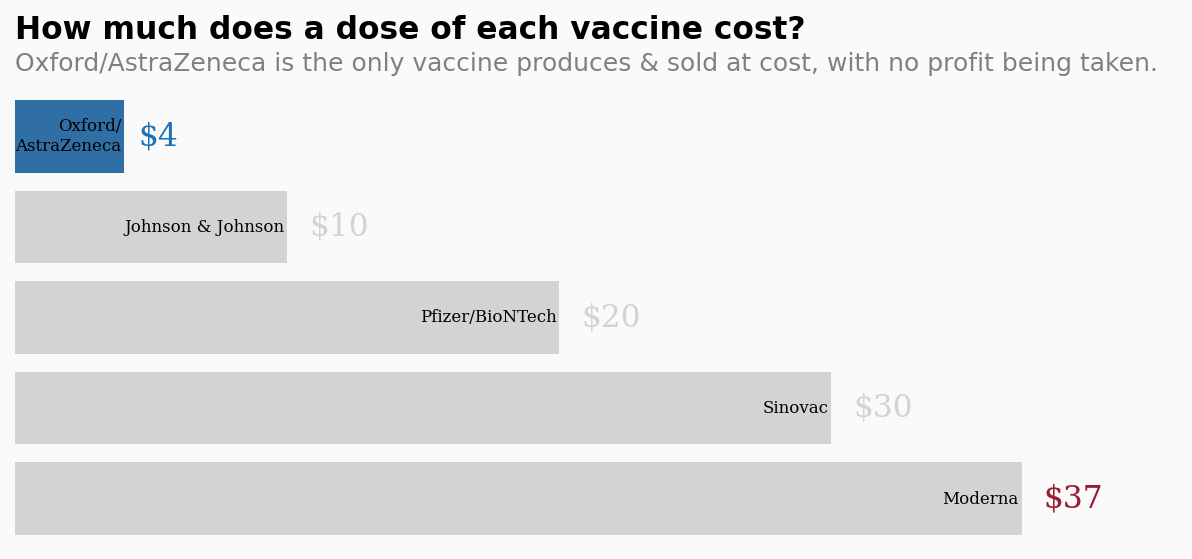

In [19]:
cst_vac = pd.DataFrame(columns=['Cost Per Dose'],
                      data = [4,10,20,30,37])

Manufacturers ='Oxford/AstraZeneca','Johnson & Johnson','Pfizer/BioNTech','Sinovac','Moderna'

cst_vac['Provider'] = Manufacturers



fig = plt.figure(figsize=(10, 4),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax0.text(0, -1, 'How much does a dose of each vaccine cost?', color='black', fontsize=15, ha='left', va='bottom', weight='bold')
ax0.text(0, -0.93, 'Oxford/AstraZeneca is the only vaccine produces & sold at cost, with no profit being taken.', 
         color='gray', fontsize=12, ha='left', va='top')

color_map = [others for _ in range(5)]
color_map[0] = uk # color highlight
sns.barplot(ax=ax0, y=cst_vac['Provider'], x=cst_vac['Cost Per Dose']*1.1,color=background_color, zorder=2, orient='h')

sns.barplot(ax=ax0, y=cst_vac['Provider'], x=cst_vac['Cost Per Dose'],palette=color_map, zorder=2, orient='h')

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.grid(False)
ax0.tick_params(labelsize=5)

labels = [ '\n'.join(wrap(l, 40)) for l in cst_vac['Provider'] ]
ax0.set_yticklabels([])

for i in range(1,5):
    ax0.annotate(cst_vac['Provider'][i], 
                   xy=(cst_vac['Cost Per Dose'][i]-0.1, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

    ax0.annotate(f"${cst_vac['Cost Per Dose'][i]}", 
                   xy=(cst_vac['Cost Per Dose'][i]+3, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color=others,rotation=0)
# diff color text
for i in range(0,1):
    ax0.annotate('$4', 
                   xy=(cst_vac['Cost Per Dose'][i]+2, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color=uk,rotation=0)
    ax0.annotate('Oxford/\nAstraZeneca', 
                   xy=(cst_vac['Cost Per Dose'][i]-0.1, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
    
for i in range(4,5):
    ax0.annotate('$37', 
                   xy=(cst_vac['Cost Per Dose'][i]+3, i),
                    va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=15, color='#9b1b30',rotation=0)        


plt.show()

The price per dose of Oxford/AstraZeneca is wildy cheaper that many of its competitors, especially Moderna & Sinovac.

What does this translate to though? Let's get the median country population and apply these figures in a 'rough and ready' type calculation 

In [20]:
world_country_pop_median = pop_vac['Population'].median()

cst_vac['Cost for mean Country Population'] = cst_vac['Cost Per Dose']*world_country_pop_median



In [21]:
!pip install circlify

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [22]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    cst_vac['Cost for mean Country Population'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

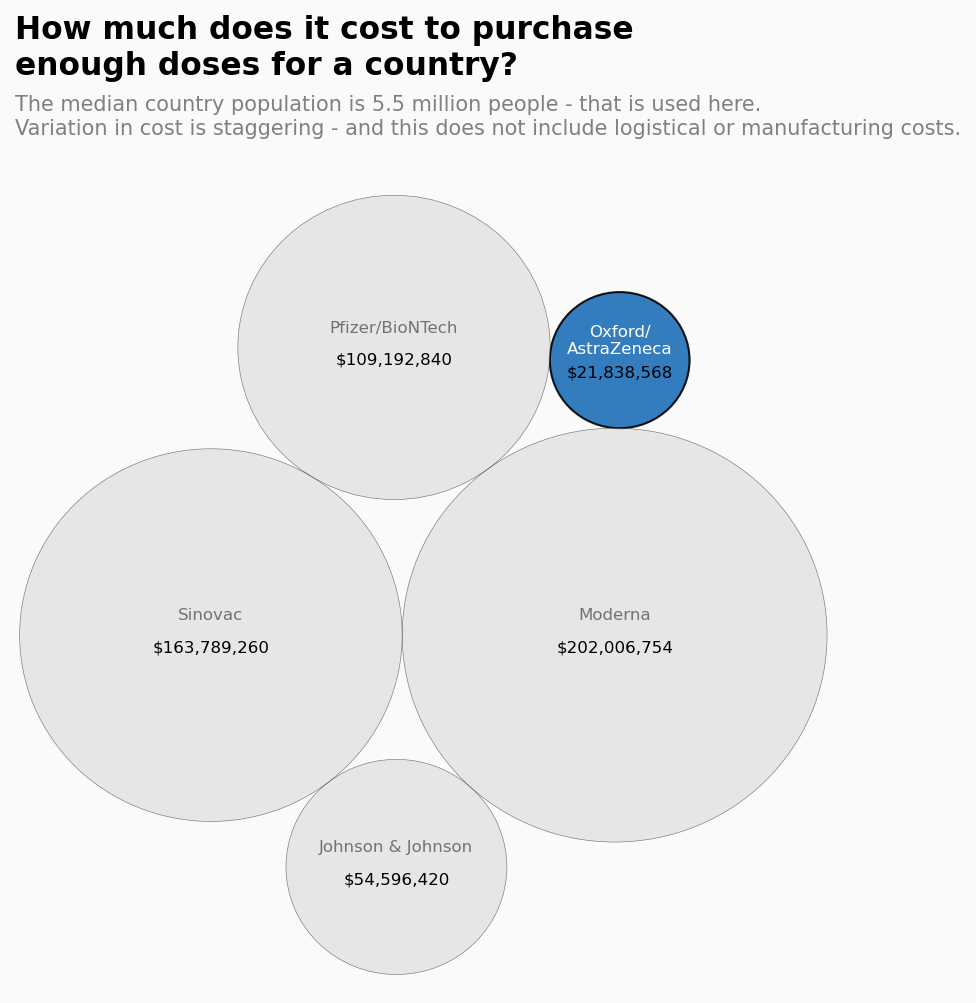

In [23]:

fig = plt.figure(figsize=(7, 7),dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax.spines[s].set_visible(False)

ax.set_facecolor(background_color)

# Title
ax.text(-1,1.3,'How much does it cost to purchase\nenough doses for a country?',fontsize=15,fontweight='bold')
ax.text(-1,1.15,'The median country population is 5.5 million people - that is used here.\nVariation in cost is staggering - and this does not include logistical or manufacturing costs.',color='gray',fontsize=10)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = cst_vac['Provider']
costs = cst_vac['Cost for mean Country Population']
# print circles
for circle, label in zip(circles, labels):
    if label == 'Oxford/AstraZeneca':
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, linewidth=1, facecolor=uk, edgecolor="black"))
        plt.annotate('Oxford/\nAstraZeneca', (x,y+0.05) ,va='center', ha='center',color='white', fontsize=8)
        
    else:
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=0.3, facecolor=others, edgecolor="black"))
        plt.annotate(label, (x,y+0.05) ,va='center', ha='center', fontsize=8, alpha=0.5)
    
for circle, costs in zip(circles, costs):
        x, y, r = circle
        plt.annotate(f"${format(round(costs), ',')}", (x,y-0.03) ,va='center', ha='center', fontsize=8) #bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
        
   


Cost is one thing, but what about storing & transporting the vaccines?

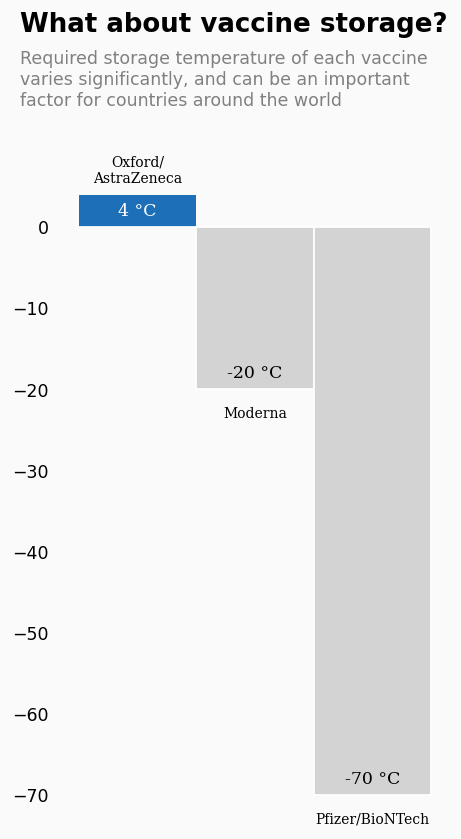

In [24]:
fig = plt.figure(figsize=(4, 7),dpi=125, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor(background_color)
for s in ["right", "top","bottom","left"]:
    ax.spines[s].set_visible(False)

ax.set_facecolor(background_color)


x = range(3)
labels = ['Oxford/AstraZeneca','Moderna','Pfizer/BioNTech']
negative_data = [4,0,0]
positive_data = [0,-20,-70]


ax.bar(x, negative_data, width=1, color=uk)
ax.bar(x, positive_data, width=1,ec='white', color=others)

ax.set_xticklabels([])
ax.tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)

ax.annotate('Oxford/\nAstraZeneca', xy=(x[0], 7), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
ax.annotate(labels[1], xy=(x[1], -23), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)
ax.annotate(labels[2], xy=(x[2], -73), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=8, color='black',rotation=0)

ax.annotate('4 °C', xy=(x[0], 2), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10, color='white',rotation=0)
ax.annotate('-20 °C', xy=(x[1], -18), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10, color='black',rotation=0)
ax.annotate('-70 °C', xy=(x[2], -68), va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10, color='black',rotation=0)

ax.text(-1,24,'What about vaccine storage?',fontsize=15,fontweight='bold')
ax.text(-1,15,'Required storage temperature of each vaccine\nvaries significantly, and can be an important\nfactor for countries around the world',color='gray',fontsize=10)


plt.show()

# Where else is using Oxford/AstraZeneca?

We know that the Oxford/AstraZeneca jab is the cheapest ans easiest to store, so where else is it being used?

In [25]:
import geopandas
import matplotlib.colors
import pycountry 

#data prep
data['ox_ast'] = data['vaccines'].str.contains('Oxford/AstraZeneca') 
data['ox_ast'] = data['ox_ast'].apply(lambda x: 1 if x == True else 0)

ox_coverage = data


#source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
ox_coverage['CODE']=alpha3code(ox_coverage['country'])


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,ox_coverage,on='CODE')




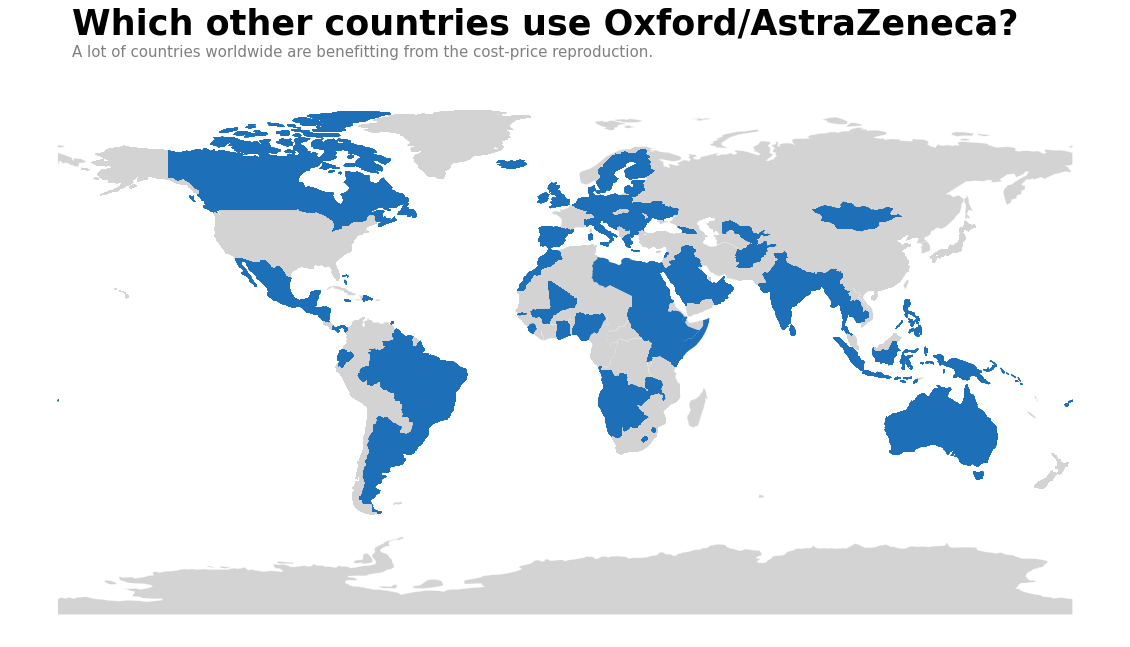

In [26]:
# Custom colour map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [others,uk])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color=others)
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='ox_ast',figsize=(20, 15),
legend=False,cmap=cmap,ax=ax)


ax.text(-175,110,'Which other countries use Oxford/AstraZeneca?',fontsize=35,fontweight='bold')
ax.text(-175,102,'A lot of countries worldwide are benefitting from the cost-price reproduction.',color='gray',fontsize=15)

plt.show()

In [27]:
# Very useful plot - not used here in the end

#https://datadependence.com/2016/06/creating-map-visualisations-in-python/
#https://boundingbox.klokantech.com/
# hihglihgt your country, add go to DublinCore
##westlimit=-9.6; southlimit=49.4; eastlimit=2.9; northlimit=59.3

#import matplotlib.pyplot as plt
#import matplotlib.cm

#from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon
#from matplotlib.collections import PatchCollection
#from matplotlib.colors import Normalize


#fig = plt.figure(figsize=(7, 7),dpi=150, facecolor='#f6f5f5')
#gs = fig.add_gridspec(1, 1)
#gs.update(wspace=0, hspace=0)
#ax = fig.add_subplot(gs[0, 0])
#ax.set_facecolor(background_color)


#westlimit=-9.6; southlimit=49.4; eastlimit=2.9; northlimit=59.3

#m = Basemap(resolution='c', # c, l, i, h, f or None
#            projection='merc',
#            lat_0=59.3, lon_0=-9.6,
#            llcrnrlon=-9.3, llcrnrlat= 49.5, urcrnrlon=2.9, urcrnrlat=59.2)#
#            #west lim     #south lim         #east lim      #northlim
#m.drawmapboundary(fill_color=background_color)
#m.fillcontinents(color=uk,lake_color=background_color)
#m.drawcoastlines()



#plt.show()

# Conclusions

Currently, the UK is performing well with respect to its vaccination programme. It is by far the most successful in Europe.

It has secured several vaccines across multiple providers to reduce risk. 

Additionally, the UK govt. heavily funded the Oxford/AstraZenexa vaccine, and as a result, ensured that it could be provided at cost to the world. 


Ultimately we are all in this together, and I hope that we will emerge from this nightmarish episode with our lives intact.


# Thank you for reading [last update 14/04/2021]

# Note that I will continue to add to this project as new ideas come to me!

# If you enjoyed, pleased consider upvoting

# Check out more of my work:



Stroke Prediction - using SHAP, LIME explainer, and ELI5, along with more data visualization

* https://www.kaggle.com/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5


Who will leave our company? Predictions and data visualization

* https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction


Customer clustering / segmentation - How to explain this to stakeholders. Along with data visualization

* https://www.kaggle.com/joshuaswords/data-visualization-clustering-mall-data



For a browse:

* https://www.kaggle.com/joshuaswords/code